# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.pipeline import Pipeline

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", 
    comment="#")

scaler = MinMaxScaler()
dataset = scaler.fit_transform(data)

dataset = pd.DataFrame(dataset)
dataset.columns = data.columns 

In [3]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1) El conjunto de datos se trata de una tabla que contiene 11 variables referidas a información crediticia de 1854 clientes. Los datos provienen del The Home Equity dataset (HMEQ).

2) Se quiere predecir la variable TARGET. El significado que tiene la variable es que el cliente es un buen candidato a devolver el dinero prestado.

3)Los atributos disponibles para la predicción son los siguientes:

* LOAN    Monto del prestamo
* MORTDUE Monto de la actual hipoteca
* VALUE   Valor de la propiedad actual
* YOJ     Antigüedad en su trabajo
* DEROG   Número de informes derogados
* DELINQ  Número de línea de crédito con deuda
* CLAGE   Antigüedad de la línea de crédito más antigua en meses
* NINQ   Número de líneas de crédito recientes
* CLNQ    Número de líneas de crédito
* DEBTINC Relación deuda/ingresos mensuales

4) Imaginamos que los features más improtantes para las predicciones son: LOAN, DEBTINC, DELINQ y CLNQ.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

----

In [4]:
#Entrenamos el clasificador SGDClassifier con los valores de hiperparámetros por defecto, definiendo únicamente la semilla aleatoria para que el experimento sea repetible.
model1 = SGDClassifier(random_state=0)
model1.fit(X_train, y_train)

#Hacemos la predicción 
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       313
         1.0       0.74      0.34      0.47        58

    accuracy                           0.88       371
   macro avg       0.82      0.66      0.70       371
weighted avg       0.87      0.88      0.86       371



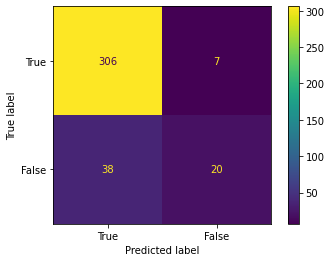

In [5]:
#Evaluamos el modelo a través de los parámetros: accuracy, precision, recall y F1
print(classification_report(y_test, y_test_pred))

#Evaluamos el modelo a través de la matriz de confusión
plot_confusion_matrix(model1, X_test ,y_test, display_labels=['True','False'])

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [6]:
param_grid = {
    'loss': ['hinge','log', 'perceptron'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'penalty': ['l2','l1']  
}

model2 = SGDClassifier(random_state=0)

cv = GridSearchCV(model2, param_grid, scoring='accuracy') #por defecto se realiza el 5 fold cross validation (parámetro "cv").
cv.fit(X, y);

In [7]:
results = cv.cv_results_

df = pd.DataFrame(results)
#df.sort_values(by='rank_test_score').head()
df[['param_alpha', 'param_loss', 'param_penalty', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_alpha,param_loss,param_penalty,mean_test_score,std_test_score,rank_test_score
7,0.0001,hinge,l1,0.871628,0.012832,1
3,0.00001,log,l1,0.870005,0.017875,2
6,0.0001,hinge,l2,0.868931,0.013494,3
13,0.001,hinge,l1,0.868394,0.007681,4
9,0.0001,log,l1,0.867853,0.015343,5


In [8]:
cv.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}

In [9]:
model3 = SGDClassifier(random_state=0, alpha=0.0001, loss='hinge', penalty='l1')


model3.fit(X_train, y_train)

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       313
         1.0       0.81      0.29      0.43        58

    accuracy                           0.88       371
   macro avg       0.85      0.64      0.68       371
weighted avg       0.87      0.88      0.85       371



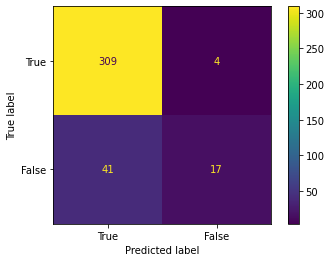

In [10]:
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(model3, X_test ,y_test, display_labels=['True','False'])

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


-----

In [11]:
#Entrenamos el modelo de árbol de decisión. 
model4 = DecisionTreeClassifier(random_state=0)

model4.fit(X_train, y_train)

#Hacemos la predicción 
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

[Text(289.32823606915616, 212.71304347826086, 'X[9] <= 0.299\ngini = 0.281\nsamples = 1483\nvalue = [1232, 251]'),
 Text(254.87373545857704, 203.2591304347826, 'X[5] <= 0.15\ngini = 0.227\nsamples = 1409\nvalue = [1225, 184]'),
 Text(212.8193135805643, 193.80521739130435, 'X[4] <= 0.15\ngini = 0.189\nsamples = 1313\nvalue = [1174, 139]'),
 Text(163.82799665788292, 184.3513043478261, 'X[6] <= 0.148\ngini = 0.169\nsamples = 1274\nvalue = [1155, 119]'),
 Text(94.76567902821519, 174.89739130434782, 'X[2] <= 0.128\ngini = 0.249\nsamples = 612\nvalue = [523, 89]'),
 Text(56.37740214666753, 165.44347826086957, 'X[0] <= 0.172\ngini = 0.345\nsamples = 257\nvalue = [200, 57]'),
 Text(30.125329391349062, 155.98956521739132, 'X[2] <= 0.06\ngini = 0.413\nsamples = 168\nvalue = [119, 49]'),
 Text(5.5086316601324, 146.53565217391304, 'X[6] <= 0.059\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(2.7543158300662, 137.08173913043478, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(8.26294749

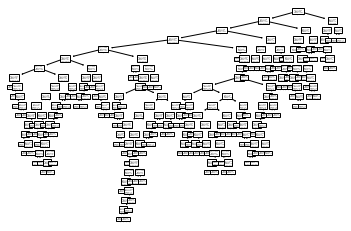

In [12]:
#Graficamos el arbol de decisión
tree.plot_tree(model4)  

In [13]:
model4.get_depth()

22

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       313
         1.0       0.63      0.67      0.65        58

    accuracy                           0.89       371
   macro avg       0.78      0.80      0.79       371
weighted avg       0.89      0.89      0.89       371



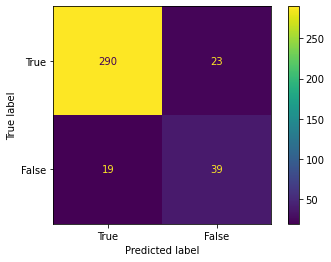

In [14]:
#Evaluamos
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(model4, X_test ,y_test, display_labels=['True','False'])


Al haber puesto los valores por defecto, el max_depth no tiene valor límite y la precisión del árbol obtenida es la máxima. Gráficamente podemos observar la gran profundidad del árbol


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [15]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [22, 4 , 2],
    'min_samples_leaf': [1,2 ]
}

model5 = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model5, param_grid, scoring='accuracy')
cv.fit(X, y);

In [16]:
results = cv.cv_results_

df = pd.DataFrame(results)
#df.sort_values(by='rank_test_score').head()
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
4,gini,2,1,0.874871,0.010243,1
5,gini,2,2,0.874871,0.010243,1
3,gini,4,2,0.871644,0.024736,3
2,gini,4,1,0.870563,0.023563,4
8,entropy,4,1,0.870557,0.013998,5


In [17]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

In [18]:
model6 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=2, min_samples_leaf=1)

model6.fit(X_train, y_train)

y_train_pred = model6.predict(X_train)
y_test_pred = model6.predict(X_test)

[Text(167.4, 181.2, 'X[9] <= 0.299\ngini = 0.281\nsamples = 1483\nvalue = [1232, 251]'),
 Text(83.7, 108.72, 'X[5] <= 0.15\ngini = 0.227\nsamples = 1409\nvalue = [1225, 184]'),
 Text(41.85, 36.23999999999998, 'gini = 0.189\nsamples = 1313\nvalue = [1174, 139]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.498\nsamples = 96\nvalue = [51, 45]'),
 Text(251.10000000000002, 108.72, 'X[6] <= 0.256\ngini = 0.171\nsamples = 74\nvalue = [7, 67]'),
 Text(209.25, 36.23999999999998, 'gini = 0.108\nsamples = 70\nvalue = [4, 66]'),
 Text(292.95, 36.23999999999998, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

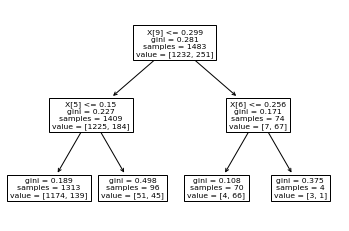

In [19]:
tree.plot_tree(model6)  

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       313
         1.0       0.94      0.28      0.43        58

    accuracy                           0.88       371
   macro avg       0.91      0.64      0.68       371
weighted avg       0.89      0.88      0.86       371



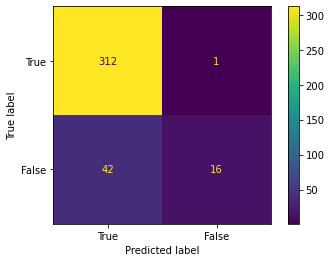

In [20]:
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(model6, X_test ,y_test, display_labels=['True','False'])

**ACCURACY - Conclusiones**

Podemos concluir que entrenando el modelo DecisionTreeClassifier con los hiperparámeros por defecto  obtuvimos mejor exactitud que utilizando la grilla. Esto se debe principalmente al efecto del parámetro "max_depth" el cual por defecto es la máxima posible. Sin embargo, al realizar la grilla y setear el valor de profundidad obtenido en el primer caso (22),obtuvimos un valor de exactitud inferior, igual a 0.88, menor al inicial igual a 0.89. 
Adicionalmente, con la grilla observamos que al setear una profundidad sumamente menor (2) obtuvimos un valor de exactitud 0.01 menor. Lo cual refleja que el costo/beneficio de aumentar la profundidad del árbol para mejorar la exactitud del modelo no es redituable en este caso. 

---
Comparando el desempeño de un clasificador con el otro, podemos decir que con el SGDClassifier obtuvimos una exactitud levemente inferior (0.88) al obtenido con el arbol de decisión (0.89), tanto con los hiperparámetros por defecto como con los mejores obtenidos de la grilla. 

---
**DATOS - Conclusiones**

En lo que respecta al dataset particular, entendemos que el objetivo es poder rechazar contundemente a los "malos" clientes (TARGET = 1). Para esto, se necesita que los "TN" sean lo de mayor cantidad,y entre los falsos positivos o falsos negativos, dado el riesgo de negocio que implica uno y el otro, se valora aquel modelo que minimiza la cantidad de falsos positivos (resulta peor brindarle un crédito a una persona "morosa" que rechazar un buen cliente.
Dicho esto, resaltamos que el mejor modelo es aquel que reduce la precisión de la clase 1, aumenta el valor de recall y tiene mayor f1-score. El modelo que cumple con estas especificaciones es el obtenido a partir del **arbol de decisión** con los parámetros por defecto.

